#### About Fisher's Iris data set
This dataset tabulates paramateres of different flower species along with species names itself. 
Overall dataset has 5 parameters.
#### Load datasets
Use function loadtxt() numpy library to load from csv file. 
Note that one of the parameters is a string type, so we have to set dtype to str.
We will require 5 different lists that store individual property values from the dataset.

In [75]:
import numpy as np

data_set = np.loadtxt("datasets/IRIS.csv", dtype = str, delimiter = ",", unpack = True)#
sepal_length, sepal_width, petal_length, petal_width, species = data_set
#print("Species: ", species)
#print("Petal length", petal_length)


#### Simple data plot 
Use matplotlib.pyplot module to plot various data plots.

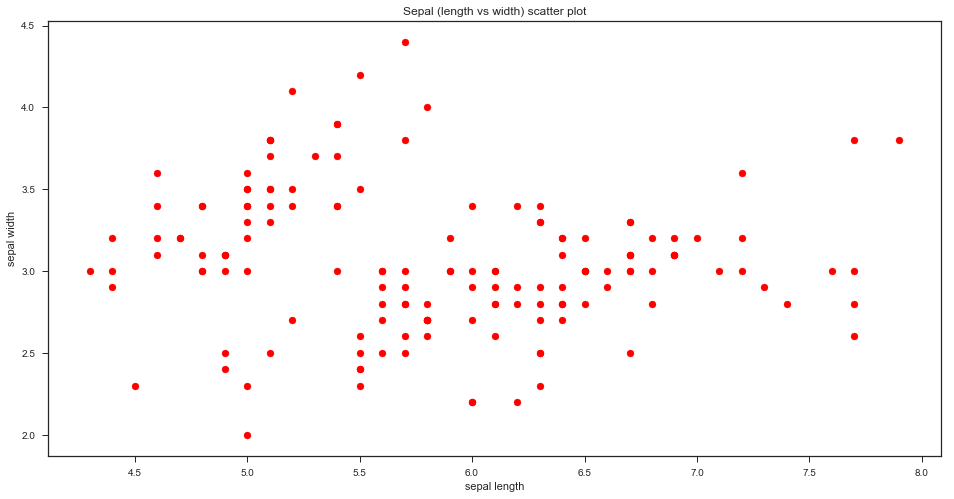

In [76]:
pl.scatter(sepal_length, sepal_width, c = 'red')
pl.xlabel('sepal length')
pl.ylabel('sepal width')
pl.title('Sepal (length vs width) scatter plot')
pl.show()

#### Complex data plot

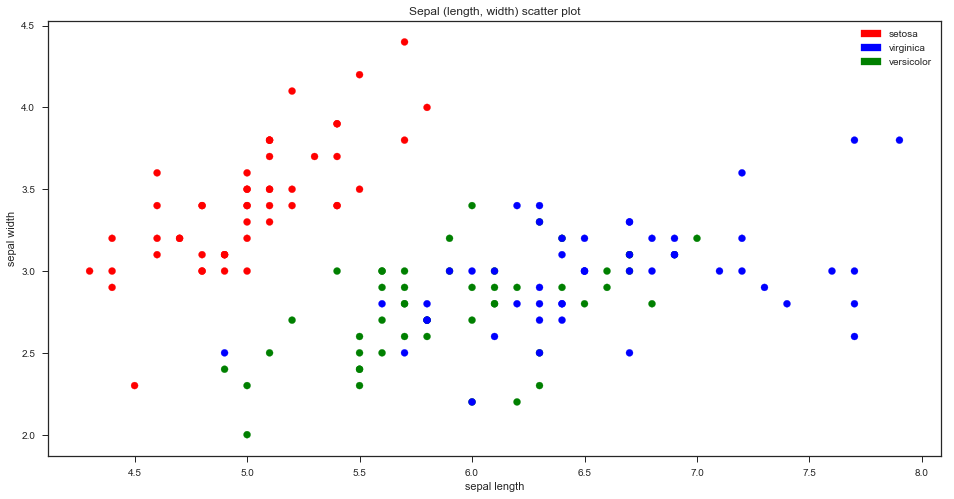

In [77]:
import matplotlib.pyplot as pl

# Make plot a bit bigger
# adapted from https://www.youtube.com/watch?v=Uf2UR9nCyVY&feature=youtu.be
pl.rcParams['figure.figsize']=(16,8)

# Each point on a graph has a label setosa, versicolor and virginica
# We need to colour each point on the graph based on it's label.
# scatter() function has a parameter for colour where we can specify our colour list. 
# Let's create a copy of the species list and change each label to colour.
_species = species
#print(species)
for index, item in enumerate(_species):
    if 'setosa' == item:
        _species[index] = "red"
    elif 'versicolor' == item:
        _species[index] = "green"
    elif 'virginica':
        _species[index] = "blue"
        
# convert list to arrays 
colours = np.array(_species)
labels = np.array(species)
#print(labels)
#print(_species)

# plots x vs y scatter plot and add colours and labels
pl.scatter(sepal_length, sepal_width, c = colours, label = labels)
#pl.scatter(petal_length, petal_width, c = colours, label = labels)
pl.xlabel('sepal length')
pl.ylabel('sepal width')

# How to match colours to a labels?
# Adopted from https://stackoverflow.com/questions/44164111/setting-a-legend-matching-the-colours-in-pyplot-scatter/44164349#44164349
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=colour, label=label) for label, colour in [('setosa', 'red'), ('virginica', 'blue'), ('versicolor', 'green')]]
pl.legend(handles=handles)
pl.title('Sepal (length, width) scatter plot')
pl.show()

#### Seaborn library

Seaborn python library provides implementation for various complex plots.
As we can see, it takes only few lines to plot data. 

Ref.: [docomentation](http://seaborn.pydata.org/api.html), [tutorial](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)

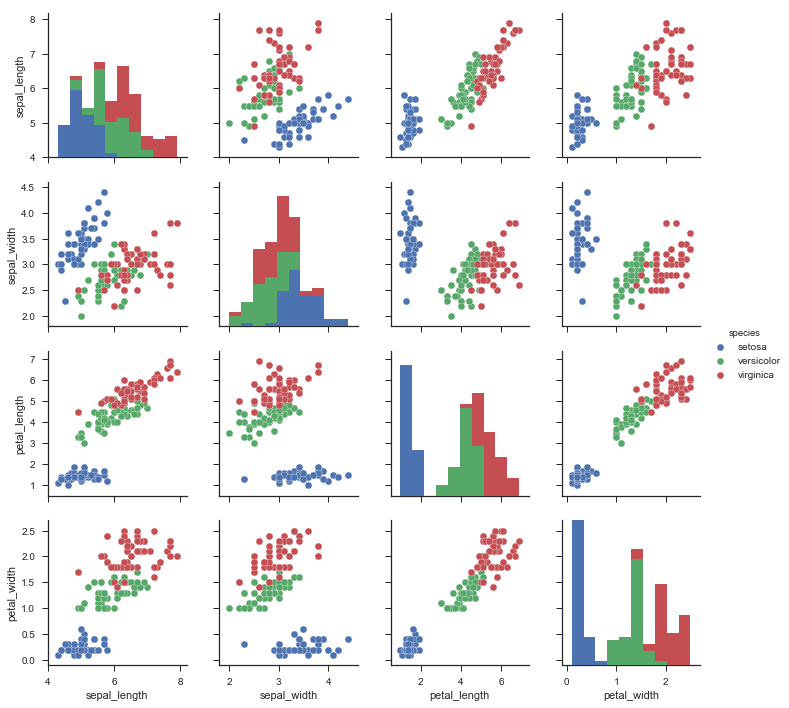

In [78]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
pl.show()

#### Fit a line on a plot

In Iris dataset we have a ratio of two values, petal's length and width.
We want to find a perfect width for the length of the petal from all the samples we got.
To do this, we need to apply a model for the data.
If we plot a scatter plot from petal length and width data readings,
we can see that a straight line seems to be appropriate data model. 

Using equation of the line, $y = mx + c$, we can find a perfect fit line for our data.

We already have y and x as length and width of the petal. 
To get m and c, we use polyfit function from numpy.

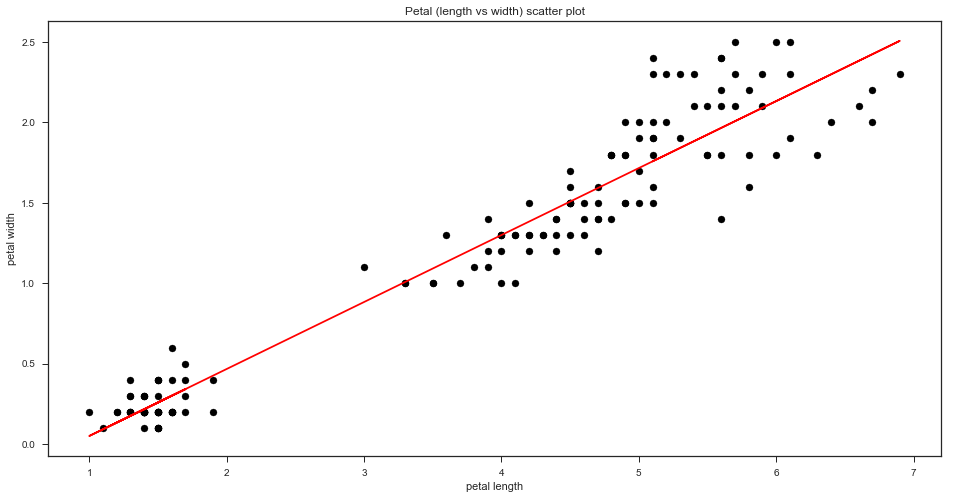

In [81]:
# convert arrays of str into type of floats
petal_length = np.array(petal_length).astype(np.float)
petal_width = np.array(petal_width).astype(np.float)
# obtain missing values of the equation for line fitting
m , c = np.polyfit(petal_length, petal_width, 1)

# scatter points on plot
pl.scatter(petal_length, petal_width, c = 'black' )
# fit a line to a plot using y and  mx + c
pl.plot(petal_length, m * petal_length + c, 'r-')

pl.xlabel('petal length')
pl.ylabel('petal width')
pl.title('Petal perfect fit line')
pl.show()

#### Calculate the R-squared value

In [83]:

rsq = np.corrcoef(petal_length, petal_width)[0][1]**2
print("The R-squared value is ", rsq)

The R-squared value is  0.926901227922


#### Fit a line for Setosa species 

In [85]:
temp = np.array(data_set) # get data list copy as array 

# we need to filter temp for setosa values
setosa = [row for row in temp if 'setosa' in row[4]]

print(setosa)

[]
